# SPARKS FOUNDATION 

# task 1 (simple linear regession )

we have to predict percentage of marks that a student is expected to score based on number of hours they studies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing the dataset
url = "http://bit.ly/w-data"
data=pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# data exploration

In [6]:
#checking null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [24]:
#describe the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.shape

(25, 2)

# outlier detection

In [25]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Hours      4.7
Scores    45.0
dtype: float64


In [27]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR
print(upper_whisker,lower_whisker)

Hours      14.45
Scores    142.50
dtype: float64 Hours     -4.35
Scores   -37.50
dtype: float64


data must be <=upper_whisker and >=lower_whisker

AxesSubplot(0.125,0.125;0.775x0.755)


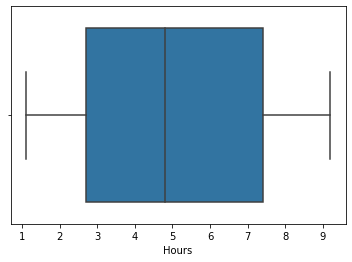

In [15]:
#according to linear regression assumption there should not be outlier in dataset 
sns.boxplot(x=data['Hours'])

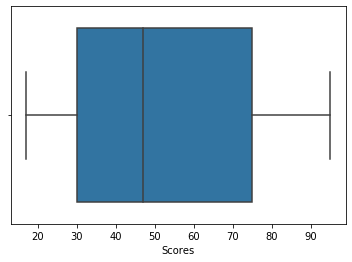

In [17]:
sns.boxplot(x=data['Scores'])

there is no outliers in data

# EDA

take a quick look at a univariate distribution in seaborn is the distplot() function.By default, this will draw a histogram and fit a kernel density estimate (KDE).



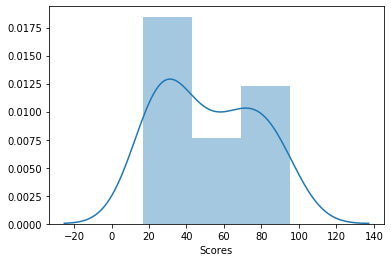

In [37]:
sns.distplot(data['Scores'])

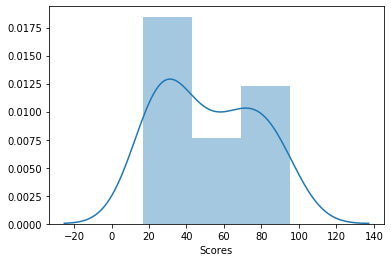

In [38]:
sns.distplot(data['Scores'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FE5F089188>,
      dtype=object)

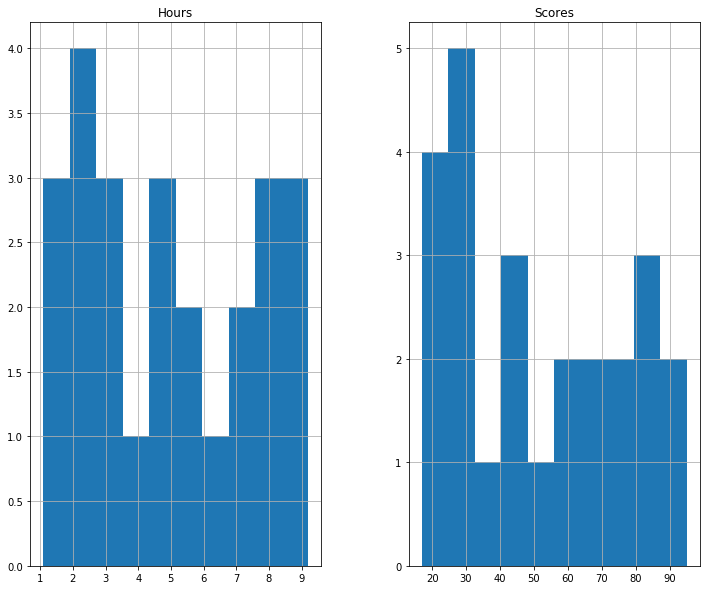

In [31]:
data.hist(figsize=(12,10))

A histogram gives us an idea about nature of distribution of data i.e. whether the data is normally distributed or it is skewed either positively or negetively. In the above histogram, we can observe for both Hours and Scores, there is a very minor skew in the positive side because many of the data points lies in this region though this very slight skew does not indicate that outliers are present in the data.



In [40]:
corr=data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


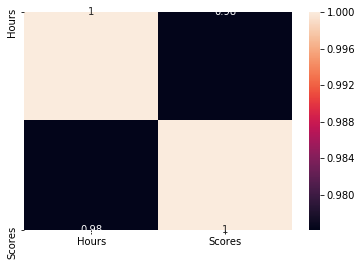

In [42]:
sns.heatmap(corr,annot=True)

Text(0.5, 1, 'linear relatioship')

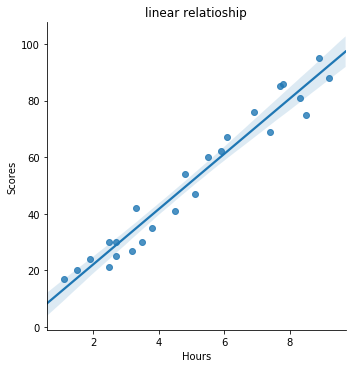

In [36]:
sns.lmplot(x="Hours",y="Scores", data=data)
plt.title("linear relatioship")

Implot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables
From the graph above, we can clearly observe that there is a positive linear relationship between the number of hours studes and the scores obtained.so we can move forward for linear regression 


In [68]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# spliting the data into train and test set

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# training the linear regression model

In [70]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# predict the test set

In [72]:
y_pred=lr.predict(x_test)

In [73]:
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

# actual vs predicted

In [74]:
df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df

,actual,predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


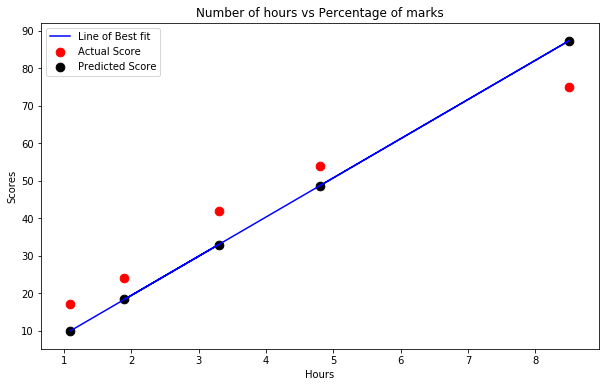

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color="red",s=75,label="Actual Score")
plt.scatter(x_test,y_pred,color="black",s=75,label="Predicted Score")
plt.plot(x_test,y_pred,color="blue",label="Line of Best fit")
plt.title("Number of hours vs Percentage of marks")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()           
plt.show()

In [94]:
#model_accuracy
from sklearn.metrics import r2_score, mean_squared_error
print('R2',r2_score(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))

R2 0.8421031525243527
mse 68.88092074277635


In [96]:
#we have to predict the percentage of score if students studies 9.2 hours/day
hours=[[9.2]]
lr.predict(hours)

array([94.70523897])